# 单层感知器

##  $\cdot$ &nbsp;感知器学习算法

### &nbsp;&nbsp;&nbsp;&nbsp;感知器学习规则

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;学习信号: &nbsp; $r = d - o = d - f(net) = d - \mathrm{sgn}(W X^T)$  
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;权值调整：&nbsp; $\bigtriangleup\boldsymbol{W} = \eta\cdot (d - \mathrm{sgn}(\boldsymbol{W}\boldsymbol{X}^T))\boldsymbol{X}$

### &nbsp;&nbsp;&nbsp;&nbsp;感知器学习规则的训练步骤  

&nbsp;&nbsp;&nbsp; （1）权值初始化  
&nbsp;&nbsp;&nbsp; （2）输入样本对  
&nbsp;&nbsp;&nbsp; （3）计算输出  
&nbsp;&nbsp;&nbsp; （4）根据感知器学习规则调整权值  
&nbsp;&nbsp;&nbsp; （5）返回到步骤(2)输入下一对样本，周而复始直到对所有样本，感知器的实际输出与期望输出相等

<img src=".\image\perceptron_learning.png" alt="感知器学习算法" width="45%">

##  $\cdot$ &nbsp;&nbsp;单层感知器算法Python实现

In [1]:
import random
import numpy as np
np.set_printoptions(precision=3)
from nnc import activation as ac
from nnc.plot_tool import *

In [2]:
# 分类问题评价指标
# 准确率 Accuracy
def accuracy(preds,labels):
    count = 0
    for i in range(len(labels)):
        if (preds[i] == labels[i]).all():
            count += 1
    return count

In [3]:
# 单层感知器模型
class SLP():
    
    def __init__(self,input_size,output_size,init_W=None,init_T=None):
        # 定义  M 输入 L输出 - 单层感知器
        #    - input_size：输入维度 M
        #    - output_size：输出维度 L
        # 激活函数 感知器 默认为sign函数
        self.input_size = input_size    # 输入数据维度 M
        self.output_size = output_size  # 输出层节点数目 L
        
        # 初始化模型参数
        if init_W is None:
            self.weight = np.random.normal(0.0,1.0,(self.input_size,self.output_size))
        else:
            if not isinstance(init_W,np.ndarray):
                self.weight = np.array(init_W,dtype=np.float64)
            else:
                self.weight = init_W
        self.weight = self.weight.reshape(self.input_size,self.output_size)
        if init_T is None:
            self.bias = random_gen.normal(0.0,1.0,(1,self.output_size))
        else:
            if not isinstance(init_T,np.ndarray):
                self.bias = np.array(-init_T,dtype=np.float64)
            else:
                self.bias = -init_T   
        self.bias = self.bias.reshape(1,self.output_size)                
                
    def __call__(self, X):
        return self.forward(X)
    
    def forward(self,X):    
        # 单层感知器的前向运算
        if X.ndim <= 1: 
            X = X.reshape(1,self.input_size)  
        net = np.dot(X,self.weight) + self.bias   # 净输入
        return np.sign(net)
        
    def update(self,X,y,d,lr):
        # X: 输入样本
        # y: 实际输出
        # d: 期望输出
        # lr: 学习率
        # 参数更新
        e = (d - y)  # 感知器的学习信号
        # 参数更新
        self.weight += lr* X.T.dot(e)
        self.bias += lr * e


In [4]:
# 定义 Runner 类
class Runner(object):    
    
    def __init__(self,model):
        # 定义感知器模型
        self.model = model
        # 评价函数 （分类 acurracy）
        self.metric = accuracy
        # 记录训练样本评价指标分数
        self.acurracy_num = []
    
    # 模型训练
    def train(self,train_dataset,lr=0.01,epochs=100,**kwargs):           
        # train_dataset 训练数据(X,y)
        # lr 学习率
        # epochs 训练轮数         
        log_epochs = kwargs.get("log_epochs", 1)   # 打印过程 默认: 循环1轮打印一次
        
        X,y = train_dataset
        if X.ndim <= 1:
            X = X.reshape(len(X),self.model.input_size)
        N,M = X.shape    # N - 样本数目  M - 输入维度       
        if y.ndim <= 1:
            y = y.reshape(N,self.model.output_size)
        
        print('\n初始权值 W(0) = : {}'.format(self.model.weight))
        print('初始阈值T(0) = {}'.format(-self.model.bias))

        # 进行num_epochs轮训练        
        for epoch in range(epochs):            
            i = epoch % N
            # 计算感知器输出 o_i = yi_pred
            xi = X[i].reshape(1,M)
            yi = y[i].reshape(1,self.model.output_size)
            yi_pred = model(xi)            
            # 更新权参数(权值和偏置)
            model.update(xi,yi_pred,yi,lr)
            
            # 计算评价指标分数(正确分类个数)
            ac_num,y_pred = self.evaluate((X,y))
            self.acurracy_num.append(ac_num)
            
            if (epoch+1) % log_epochs == 0:
                np.set_printoptions(precision=4)
                print(f"\n+ 第{epoch+1}步:") 
                print(' - 输入数据 X{}: {}'.format(i+1,X[i]))
                print(' - 实际输出o{}: {}'.format(epoch+1,yi_pred.squeeze()))
                print(' - 期望输出d{}: {}'.format(epoch+1,y[i].squeeze()))                
                print(' - 更新后的权值 W({}): {}'.format(epoch+1,self.model.weight.squeeze()))
                print(' - 更新后的阈值T({}): {}'.format(epoch+1,-self.model.bias.squeeze()))
                print(f" - 对所有样本正确分类的数目：{ac_num}/{N}")
            
            # 判断算法是否停止(评价模型)
            if ac_num == N or epoch == epochs:                
                output = self.predict(X)
                print('\n 训练结束: ')   
                print(f" - 对所有样本正确分类的数目：{ac_num}/{N}")
                #print(f' - 期望输出: {y.squeeze()}')
                #print(f' - 实际输出: {output}')
                if ac_num != N:
                    print(f' - 算法迭代次数: {epoch+1}')
                else:
                    print(f' - 算法迭代次数: {epoch}')
                return output
        
    # 模型评价
    def evaluate(self,dataset):        
        X, y = dataset
        # 计算模型输出
        y_pred = self.model(X).squeeze()
        # 计算评价指标 (正确分类个数)
        score = self.metric(y_pred, y)
        return score,y_pred
    
    # 模型预测    
    def predict(self,X):
        return self.model(X).squeeze()
        

##  $\cdot$ &nbsp;单计算节点感知器实现二分类问题

&nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; 单计算节点单层感知器
<img src=".\image\slp_2_1.png" alt="单计算节点感知器" width="30%">

### &nbsp;&nbsp; 利用感知器实现逻辑“与”和逻辑“或”功能

<img src=".\image\and_or.png" alt="逻辑“与”和“或”真值表" width="75%">

<font size=4 color=blue face="宋体"> **例：** </font><font size=4 face="宋体">将逻辑“与”运算看成一个二分类问题. 用感知器学习规则 训练一个分类器,实现“与”运算.  
&nbsp;&nbsp; 输入样本：X = ([0, 0], [0, 1], [1, 0], [1, 1])  
&nbsp;&nbsp; 期望输出：y = (-1, -1, -1, 1)  
&nbsp;&nbsp; 学习率 $\eta=0.05$, 初始权值 $\boldsymbol{W}=[0.27,0.07]$，初始阈值 $T=0.22$.</font>


训练单层感知器实现“与”运算

初始权值 W(0) = : [[0.27]
 [0.07]]
初始阈值T(0) = [[0.22]]

+ 第1步:
 - 输入数据 X1: [0 0]
 - 实际输出o1: -1.0
 - 期望输出d1: -1
 - 更新后的权值 W(1): [0.27 0.07]
 - 更新后的阈值T(1): 0.22
 - 对所有样本正确分类的数目：3/4

+ 第2步:
 - 输入数据 X2: [0 1]
 - 实际输出o2: -1.0
 - 期望输出d2: -1
 - 更新后的权值 W(2): [0.27 0.07]
 - 更新后的阈值T(2): 0.22
 - 对所有样本正确分类的数目：3/4

+ 第3步:
 - 输入数据 X3: [1 0]
 - 实际输出o3: 1.0
 - 期望输出d3: -1
 - 更新后的权值 W(3): [0.17 0.07]
 - 更新后的阈值T(3): 0.32
 - 对所有样本正确分类的数目：3/4

+ 第4步:
 - 输入数据 X4: [1 1]
 - 实际输出o4: -1.0
 - 期望输出d4: 1
 - 更新后的权值 W(4): [0.27 0.17]
 - 更新后的阈值T(4): 0.22
 - 对所有样本正确分类的数目：3/4

+ 第5步:
 - 输入数据 X1: [0 0]
 - 实际输出o5: -1.0
 - 期望输出d5: -1
 - 更新后的权值 W(5): [0.27 0.17]
 - 更新后的阈值T(5): 0.22
 - 对所有样本正确分类的数目：3/4

+ 第6步:
 - 输入数据 X2: [0 1]
 - 实际输出o6: -1.0
 - 期望输出d6: -1
 - 更新后的权值 W(6): [0.27 0.17]
 - 更新后的阈值T(6): 0.22
 - 对所有样本正确分类的数目：3/4

+ 第7步:
 - 输入数据 X3: [1 0]
 - 实际输出o7: 1.0
 - 期望输出d7: -1
 - 更新后的权值 W(7): [0.17 0.17]
 - 更新后的阈值T(7): 0.32
 - 对所有样本正确分类的数目：4/4

 训练结束: 
 - 对所有样本正确分类的数目：4/4
 - 算法迭代次数: 6
 - 感知器权值W: [0.17 0.17] 阈值

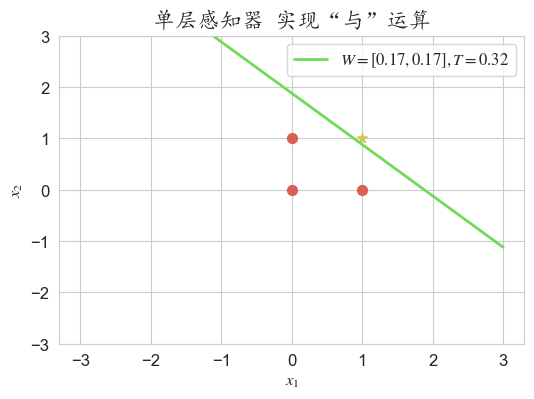

In [5]:
# 将逻辑“与”运算看成一个二分类问题
# 输入样本与期望输出
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([-1, -1, -1, 1])
train_data = (X,y)
# y = np.array([0, 0, 0, 1])
   
# 训练与操作      
print('\n训练单层感知器实现“与”运算')
print("================================================================================")

# (1) 模型构建 --- 单层感知器模型     
input_size = X.shape[1]
output_size = 1
init_W = [0.27,0.07]
init_T = 0.22
# 实例化模型
model = SLP(input_size,output_size,init_W=init_W,init_T=init_T)   

# (2) 模型训练
# 实例化Runner类, 并传入训练配置    
runner = Runner(model)
# 模型训练 
lr = 0.05       # 学习率
epochs = 10     # 循环次数 
runner.train(train_data,lr=lr,epochs=epochs)

print(" - 感知器权值W:", model.weight.squeeze(), "阈值T:", -model.bias.squeeze())

print("\n + 绘制分类边界")
# 绘制分类结果
num = np.linspace(-3, 3, 100)  # Sample dat
w = [-model.bias.item()]
w.extend(model.weight.squeeze())
classnum = 2
classindex = []
for yi in y:
    if yi <= 0:classindex.append(0)
    else: classindex.append(1)
        
draw_decision_boundary(num,(X,classindex),[w],title='单层感知器 实现“与”运算')

print("\n ================================================================================\n")

<font size=4 color=blue face="宋体"> **P46 例3-2：** </font><font size=4 face="宋体">单计算节点感知器有3个输入. 给定3对训练样本$(X_1,y_1)$,$(X_2,y_2)$,$(X_3,y_3)$ 训练可用于二分类的感知器.  
&nbsp;&nbsp; 输入样本：X = ([1,-2,0], [0,1.5,-0.5], [-1,1, 0.5])  
&nbsp;&nbsp; 期望输出：y = (0,0,1)  
&nbsp;&nbsp; 学习率 $\eta=0.1$, 初始权值 $\boldsymbol{W}=[1,-1,0]$，初始阈值 $T=0.5$.</font>

In [6]:
# 二分类问题
# P46 例3-2 某单计算节点感知器有3个输入. 给定3对训练样本(X1,y1),(X2,y2),(X3,y3),训练感知器
# 输入样本与期望输出
X = np.array([[1,-2,0], [0,1.5,-0.5], [-1,1, 0.5]])
y = np.array([-1, -1, 1])
# y = np.array([0, 0, 1])
train_data = (X,y)
   
# 训练与操作      
print('\n训练单层感知器实现二分类')
print("================================================================================")

# (1) 模型构建 --- 单层感知器模型     
input_size = X.shape[1]
output_size = 1
init_W = [1,-1,0]
init_T = 0.5
# 实例化模型
model = SLP(input_size,output_size,init_W=init_W,init_T=init_T)   

# (2) 模型训练
# 实例化Runner类, 并传入训练配置    
runner = Runner(model)
# 模型训练 
lr = 0.1       # 学习率
epochs = 150     # 循环次数 
runner.train(train_data,lr=lr,epochs=epochs)

print(" - 感知器权值W:", model.weight.squeeze(), "阈值T:", -model.bias.squeeze())
print("\n ================================================================================\n")



训练单层感知器实现二分类

初始权值 W(0) = : [[ 1.]
 [-1.]
 [ 0.]]
初始阈值T(0) = [[0.5]]

+ 第1步:
 - 输入数据 X1: [ 1. -2.  0.]
 - 实际输出o1: 1.0
 - 期望输出d1: -1
 - 更新后的权值 W(1): [ 0.8 -0.6  0. ]
 - 更新后的阈值T(1): 0.7
 - 对所有样本正确分类的数目：1/3

+ 第2步:
 - 输入数据 X2: [ 0.   1.5 -0.5]
 - 实际输出o2: -1.0
 - 期望输出d2: -1
 - 更新后的权值 W(2): [ 0.8 -0.6  0. ]
 - 更新后的阈值T(2): 0.7
 - 对所有样本正确分类的数目：1/3

+ 第3步:
 - 输入数据 X3: [-1.   1.   0.5]
 - 实际输出o3: -1.0
 - 期望输出d3: 1
 - 更新后的权值 W(3): [ 0.6 -0.4  0.1]
 - 更新后的阈值T(3): 0.49999999999999994
 - 对所有样本正确分类的数目：1/3

+ 第4步:
 - 输入数据 X1: [ 1. -2.  0.]
 - 实际输出o4: 1.0
 - 期望输出d4: -1
 - 更新后的权值 W(4): [4.0000e-01 5.5511e-17 1.0000e-01]
 - 更新后的阈值T(4): 0.7
 - 对所有样本正确分类的数目：2/3

+ 第5步:
 - 输入数据 X2: [ 0.   1.5 -0.5]
 - 实际输出o5: -1.0
 - 期望输出d5: -1
 - 更新后的权值 W(5): [4.0000e-01 5.5511e-17 1.0000e-01]
 - 更新后的阈值T(5): 0.7
 - 对所有样本正确分类的数目：2/3

+ 第6步:
 - 输入数据 X3: [-1.   1.   0.5]
 - 实际输出o6: -1.0
 - 期望输出d6: 1
 - 更新后的权值 W(6): [0.2 0.2 0.2]
 - 更新后的阈值T(6): 0.49999999999999994
 - 对所有样本正确分类的数目：2/3

+ 第7步:
 - 输入数据 X1: [ 1. -2.  0.]
 - 实际输出

##  $\cdot$ &nbsp;单层感知器实现多分类

<font size=4 color=blue face="宋体"> **例：** </font><font size=4 face="宋体"> 利用给定的8对训练样本$(X_1,y_1),\cdots,(X_8,y_8)$ 训练感知器，实现对4类样本的分类.  
&nbsp;&nbsp; 输入样本：X1=(1 1),X6=(-2 1), X3=(2 -1),  X7=(-1 -1),X4=(2 0), X2=(1 2), X8=(-2 -2), X5=(-1 2)  
&nbsp;&nbsp; 类别标签：y1 = (-1 -1),y6=(1 -1),y3=(-1 1), y7=(1 1), y4=(-1 1), y2=(-1 -1),  y8=(1 1), y5=(1 -1)  
&nbsp;&nbsp; 学习率 $\eta=0.1$, 初始权值 $\boldsymbol{W}=[[1,-1],[0,0.2]]$，初始阈值 $T=[0.5,1]$.</font>


训练2输入2输出单层感知器实现4分类

初始权值 W(0) = : [[ 1.  -1. ]
 [ 0.   0.2]]
初始阈值T(0) = [[0.5 1. ]]

+ 第1步:
 - 输入数据 X1: [-1  2]
 - 实际输出o1: [-1.  1.]
 - 期望输出d1: [ 1 -1]
 - 更新后的权值 W(1): [[ 0.   0. ]
 [ 2.  -1.8]]
 - 更新后的阈值T(1): [-0.5  2. ]
 - 对所有样本正确分类的数目：2/8

+ 第2步:
 - 输入数据 X2: [-1 -1]
 - 实际输出o2: [-1. -1.]
 - 期望输出d2: [1 1]
 - 更新后的权值 W(2): [[-1.  -1. ]
 [ 1.  -2.8]]
 - 更新后的阈值T(2): [-1.5  1. ]
 - 对所有样本正确分类的数目：4/8

+ 第3步:
 - 输入数据 X3: [1 1]
 - 实际输出o3: [ 1. -1.]
 - 期望输出d3: [-1 -1]
 - 更新后的权值 W(3): [[-2.  -1. ]
 [ 0.  -2.8]]
 - 更新后的阈值T(3): [-0.5  1. ]
 - 对所有样本正确分类的数目：6/8

+ 第4步:
 - 输入数据 X4: [2 0]
 - 实际输出o4: [-1. -1.]
 - 期望输出d4: [-1  1]
 - 更新后的权值 W(4): [[-2.   1. ]
 [ 0.  -2.8]]
 - 更新后的阈值T(4): [-0.5 -0. ]
 - 对所有样本正确分类的数目：8/8

 训练结束: 
 - 对所有样本正确分类的数目：8/8
 - 算法迭代次数: 3
感知器权值W: [[-2.   1. ]
 [ 0.  -2.8]] 阈值T: [[-0.5 -0. ]]

 + 绘制分类边界


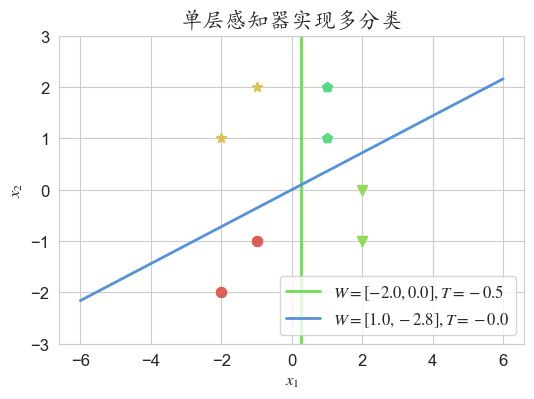

In [7]:
# 输入样本与期望输出
X = np.array([[1,1],[-2,1],[2,-1],[-1,-1],[2,0],[1,2],[-2,-2],[-1,2]])
Y = np.array([[-1,-1],[1,-1],[-1,1],[1,1],[-1,1],[-1,-1],[1,1],[1,-1]])

# 随机打乱样本
idx = np.random.permutation(np.arange(X.shape[0]))
X = X[idx]
Y = Y[idx]  
dataset = (X,Y)

# 训练与操作      
print('\n训练2输入2输出单层感知器实现4分类')
print("================================================================================")

# (1) 模型构建 --- 单层感知器模型 （2输入2输出）
input_size = X.shape[1]
output_size = Y.shape[1]     
init_W = np.array([[1,-1],[0,0.2]],dtype=np.float64) 
init_T = np.array([0.5,1],dtype=np.float64)
#init_W = np.array([[1,0],[0,1]],dtype=np.float64) 
#init_T = np.array([1,1],dtype=np.float64)
# 实例化模型
model = SLP(input_size,output_size,init_W=init_W,init_T=init_T)   
#model = SLP(input_size,output_size)  
# (2) 模型训练
# 实例化Runner类, 并传入训练配置    
runner = Runner(model)
# 模型训练 
lr = 0.5         # 学习率
epochs = 100     # 训练最大轮次  
log_epochs = 1
runner.train(dataset,lr=lr,epochs=epochs,log_epochs=log_epochs)

print("感知器权值W:", model.weight, "阈值T:", -model.bias)

print("\n + 绘制分类边界")
# 绘制分类结果
num = np.linspace(-6, 6, 100)  # Sample dat
W = []
for i in range(output_size):
    w = []
    w.append(-model.bias.squeeze()[i])
    w.extend(model.weight[:,i].squeeze())
    W.append(w)

classindex = []
for yi in Y:
    if (yi == [1,1]).all():
        classindex.append(0)
    elif (yi == [1,-1]).all():
        classindex.append(1)
    elif (yi == [-1,1]).all():
        classindex.append(2)
    elif (yi == [-1,-1]).all():
        classindex.append(3)
    else:
        print('模式错误！')
draw_decision_boundary(num,(X,classindex),W,title='单层感知器实现多分类')

print("\n ================================================================================\n")